In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

In [3]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])

In [4]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 1000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_db = sc.fit_transform(X)
#j = 0
#a = [i for i in range(10), j for j in range(11)]
l = []
#index = [2,3,4,5,6,7,8,9,10,11]
for n in range(2, 11):
    for k in range(1,11):
        X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
        sc = StandardScaler()
        X_db = sc.fit_transform(X)
        n_clusters = n

        #labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)
        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)
        s = metrics.silhouette_score(X_db, labels)
        
        l.append([n,s])
        #l.insert(index,var)
        
        #a[n - 2][k -1] = s
        #cluster_dict = dict



        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
              % s)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Number of clusters: 2
Silhouette Coefficient: 0.387
Number of clusters: 2
Silhouette Coefficient: 0.226
Number of clusters: 2
Silhouette Coefficient: 0.226
Number of clusters: 2
Silhouette Coefficient: 0.372
Number of clusters: 2
Silhouette Coefficient: 0.371
Number of clusters: 2
Silhouette Coefficient: 0.361
Number of clusters: 2
Silhouette Coefficient: 0.362
Number of clusters: 2
Silhouette Coefficient: 0.229
Number of clusters: 2
Silhouette Coefficient: 0.361
Number of clusters: 2
Silhouette Coefficient: 0.367
Number of clusters: 3
Silhouette Coefficient: 0.256
Number of clusters: 3
Silhouette Coefficient: 0.251
Number of clusters: 3
Silhouette Coefficient: 0.258
Number of clusters: 3
Silhouette Coefficient: 0.256
Number of clusters: 3
Silhouette Coefficient: 0.262
Number of clusters: 3
Silhouette Coefficient: 0.253
Number of clusters: 3
Silhouette Coefficient: 0.252
Number of clusters: 3
Silhouette Coefficient: 0.265
Number of clusters: 3
Silhouette Coefficient: 0.251
Number of cl

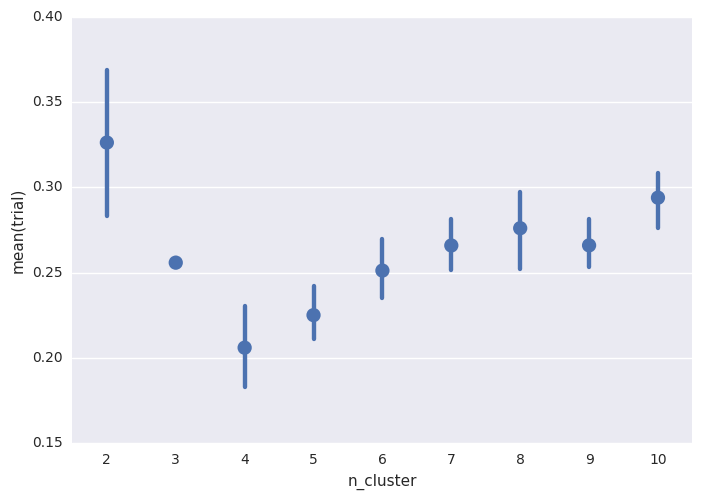

In [6]:
#print l
dt = pd.DataFrame(l)
dt.columns=["n_cluster","trial"]
#print dt
sns.pointplot(x="n_cluster", y="trial", data=dt,join=False)